In [1]:
# importing the required libraries

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
# loading the data

digits = datasets.load_digits()

In [3]:
# a function to plot the image

def image(array) :
    plt.imshow(array, cmap=plt.cm.gray_r, interpolation='nearest')

In [4]:
# loading data into a data frame

data = pd.DataFrame(digits.data,columns=digits.feature_names)

In [5]:
# splitting 80%-20% data into training and test data

X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.2)

In [6]:
# fitting logistic regression without PCA

model = LogisticRegression()
model.fit(X_train,y_train)
print('Model Accuracy without PCA is %.2f'%model.score(X_test,y_test))

Model Accuracy without PCA is 0.96


C:\Users\MADHAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# calling a PCA on training data
pca = PCA()
pca.fit(X_train)

# finding out the optimal number of clusters for 95% variance
t = pca.explained_variance_ratio_.cumsum()>0.95
n = 0
for i in range(len(t)) :
    if t[i] :
        n = i+1
        break
print('Number of components consisting of atleast 95% variance is',n)

Number of components consisting of atleast 95% variance is 28


In [8]:
# fitting PCA with opotimal number of components

pca = PCA(n_components = n)
pca.fit(X_train)

PCA(n_components=28)

In [9]:
# fitting Logistic Regression model on the reduced components

model.fit(pca.transform(X_train),y_train)
print('Model Accuracy after the PCA is %.2f'%model.score(pca.transform(X_test),y_test))

Model Accuracy after the PCA is 0.95


C:\Users\MADHAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Clearly the accuracy is almost equal in both cases.

In [10]:
# confusion matrix for test data of model with reduced components 
results = confusion_matrix(y_test,model.predict(pca.transform(X_test)))
print(results,'\n\n')

# number of wrong predictions
dia = np.diag_indices(10)
dia_sum = sum(results[dia])
off_dia_sum = np.sum(results) - dia_sum
print('Number of instances predicted wrong =',off_dia_sum)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  1  0  0  0  0  2  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  1  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  2  0 37  0  0  0  2]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  1  0  0  0 35  0  0]
 [ 0  3  0  0  0  0  2  0 36  0]
 [ 0  0  0  1  0  0  0  2  0 32]] 


Number of instances predicted wrong = 17


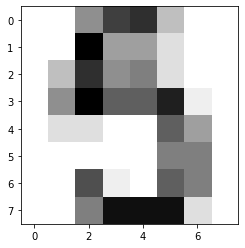

Correct Value = 5
Predicted Value = 9 




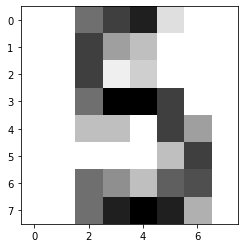

Correct Value = 5
Predicted Value = 9 




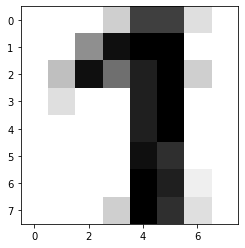

Correct Value = 1
Predicted Value = 3 




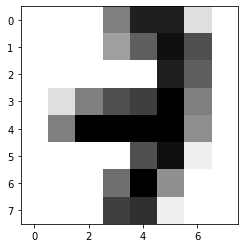

Correct Value = 7
Predicted Value = 3 




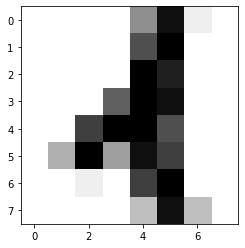

Correct Value = 1
Predicted Value = 8 




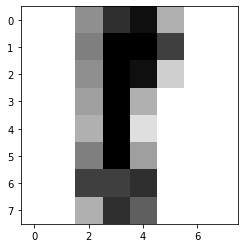

Correct Value = 8
Predicted Value = 1 




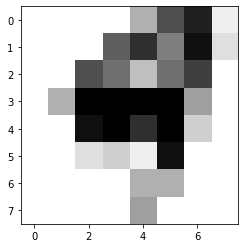

Correct Value = 9
Predicted Value = 7 




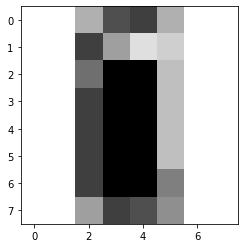

Correct Value = 1
Predicted Value = 8 




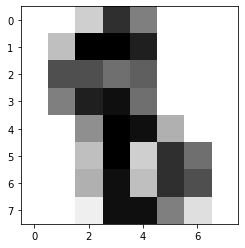

Correct Value = 8
Predicted Value = 6 




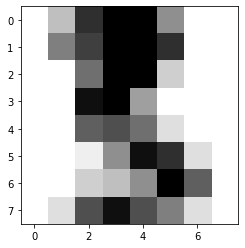

Correct Value = 3
Predicted Value = 8 




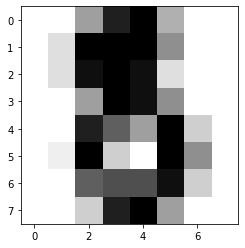

Correct Value = 8
Predicted Value = 1 




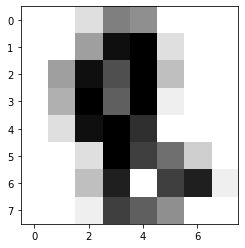

Correct Value = 8
Predicted Value = 6 




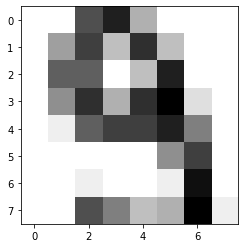

Correct Value = 9
Predicted Value = 7 




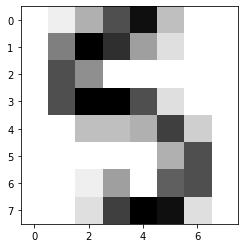

Correct Value = 5
Predicted Value = 3 




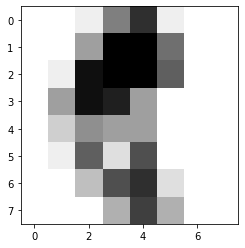

Correct Value = 8
Predicted Value = 1 




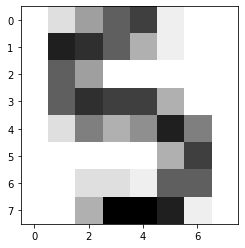

Correct Value = 5
Predicted Value = 3 




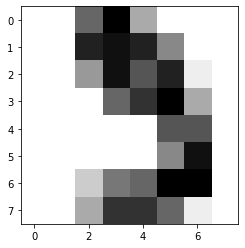

Correct Value = 9
Predicted Value = 3 




In [11]:
# plotting wrong predictions

wrong_preds = []
for i in range(len(y_test)) :
    if y_test[i] != model.predict(pca.transform(X_test))[i] :
        arr = []
        arr.append(y_test[i])
        arr.append(model.predict(pca.transform(X_test))[i])
        arr.extend(list(X_test.iloc[i]))
        wrong_preds.append(arr)

for i in wrong_preds :
    plt.imshow(np.array(i[2:]).reshape(8,8),cmap=plt.cm.gray_r)
    plt.show()
    print('Correct Value =',i[0])
    print('Predicted Value =',i[1],'\n\n')